# K Nearest Neighbor Classification

### Import necessary modules

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# For this part, we need to import mglearn library which can be found at https://github.com/amueller/introduction_to_ml_with_python


### Read Data file for Highway Crash 

In [328]:
df=pd.read_csv(r"Traffic_crash_data.csv")

In [329]:
df.columns

Index(['cvs_x', 'cvs_x1', 'cvs_y', 'cvs_y1', 'crash', 'day', 'hour', 'date',
       'oc_x', 'oc_x1', 'oc_y', 'oc_y1', 'sp_x', 'sp_x1', 'sp_y', 'sp_y1',
       'sd_oc_x', 'sd_oc_x1', 'sd_oc_y', 'sd_oc_y1', 'sd_sp_x', 'sd_sp_x1',
       'sd_sp_y', 'sd_sp_y1', 'sd_vl_x', 'sd_vl_x1', 'sd_vl_y', 'sd_vl_y1',
       'vl_x', 'vl_x1', 'vl_y', 'vl_y1', 'wt', 'Evc'],
      dtype='object')

## Data Preparation 

#### Defining target variable

In [307]:
y=np.array(df.crash)

#### Drop uneccesary columns

In [308]:
df.drop(['crash'],1,inplace=True)
df.drop(['date'],1,inplace=True)

#### Defining input features

In [309]:
X=df.values

In [310]:
X

array([[7.09350240e-02, 4.03671230e-02, 5.64724350e-02, ...,
        1.43000000e+02, 1.00000000e+00, 0.00000000e+00],
       [4.98764960e-02, 3.81670650e-02, 5.68569090e-02, ...,
        1.65000000e+02, 1.00000000e+00, 0.00000000e+00],
       [5.11102090e-02, 4.06971850e-02, 4.70223490e-02, ...,
        1.50000000e+02, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.30356580e-02, 9.23028000e-02, 4.25788360e-02, ...,
        3.64000000e+02, 1.00000000e+00, 1.00000000e+00],
       [4.58487860e-02, 1.90136578e-01, 2.91842150e-02, ...,
        2.07000000e+02, 1.00000000e+00, 1.00000000e+00],
       [8.40179760e-02, 1.79000522e-01, 1.09121049e-01, ...,
        7.70000000e+01, 1.00000000e+00, 1.00000000e+00]])

## plot dataset with two features in 2D space

X.shape: (822, 32)


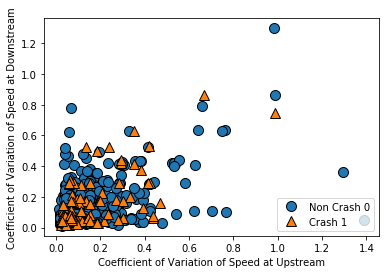

In [311]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Non Crash 0", "Crash 1"], loc=4)
plt.xlabel("Coefficient of Variation of Speed at Upstream")
plt.ylabel("Coefficient of Variation of Speed at Downstream")
print("X.shape: {}".format(X.shape))

## Example plots on how KNN search nearest neighbors  

C:\Users\rezac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


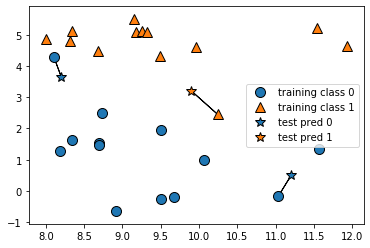

In [312]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\rezac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


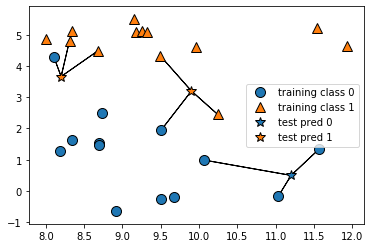

In [313]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## Fitting a k Nearest Neighbor Classifier

### Searching for Optimal Number of Neighbors

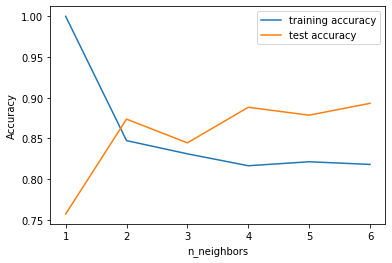

In [314]:
from sklearn.datasets import load_breast_cancer
X_train, X_test, y_train, y_test = train_test_split(
   X,y, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 7)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Visulization of with 2D plot 

### Visulization with Two Features

In [319]:
from matplotlib.colors import ListedColormap

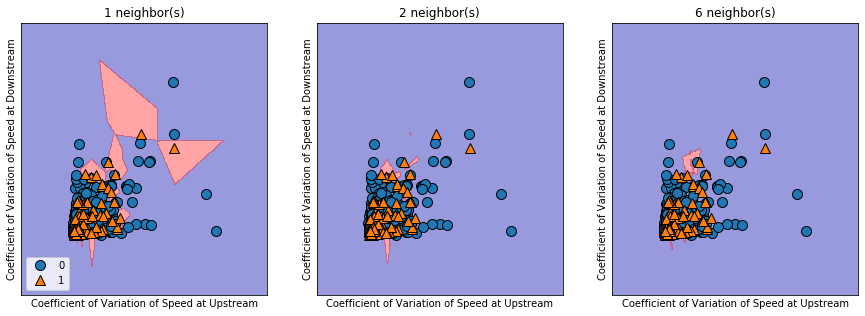

In [320]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for n_neighbors, ax in zip([1, 2, 6], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X[:,0:2], y)
    mglearn.plots.plot_2d_separator(clf, X[:,0:2], fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Coefficient of Variation of Speed at Upstream")
    ax.set_ylabel("Coefficient of Variation of Speed at Downstream")
    axes[0].legend(loc=3)

### Fitting the model with optimal number of neighbors (=2)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

In [139]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [140]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [141]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.84


# K Nearest Neighbor Prediction

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
import matplotlib

### Read Data file for Highway speed prediction 

In [252]:
df=pd.read_csv("Traffic_prediction_data.csv",parse_dates=['Datetime'])

In [253]:
df.columns

Index(['Datetime', 'tl_speed', 'us_speed', 'ds_speed', 'day', 'hour',
       'shift_speed'],
      dtype='object')

In [254]:
df.head()

,Datetime,tl_speed,us_speed,ds_speed,day,hour,shift_speed
0,2017-09-03 00:00:00,73.892857,76.718750,74.774194,6,0,71.702703
1,2017-09-03 00:05:00,71.702703,74.906250,70.897436,6,0,71.972973
2,2017-09-03 00:10:00,71.972973,74.930233,73.421053,6,0,73.366667
3,2017-09-03 00:15:00,73.366667,76.027027,74.457143,6,0,72.000000
4,2017-09-03 00:20:00,72.000000,75.837838,73.333333,6,0,73.666667


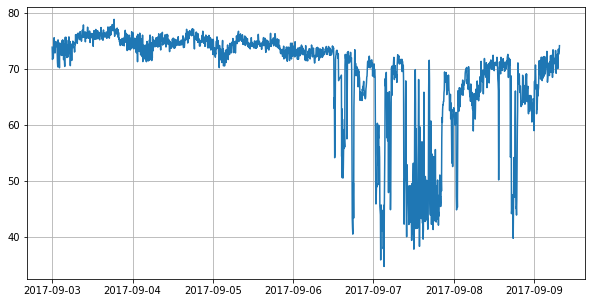

In [255]:
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(df['Datetime'],df['tl_speed'])
plt.grid(True)
plt.show()

In [256]:
train_size=len(df[(df['Datetime']>='2017-09-03 00:00:00' ) & (df['Datetime']<='2017-09-08 00:00:00' )])

In [257]:
dates=df.Datetime

In [258]:
y=np.array(df.shift_speed)

In [259]:
df.drop(['Datetime','shift_speed'],1,inplace=True)

In [260]:
X=df.values

In [261]:
X_train=X[:train_size,:]
X_test=X[train_size:,:]
y_train=y[:train_size]
y_test=y[train_size:]
dates=dates[train_size:,]

In [262]:
len(dates)

379

## Example plots on how KNN search nearest neighbors  

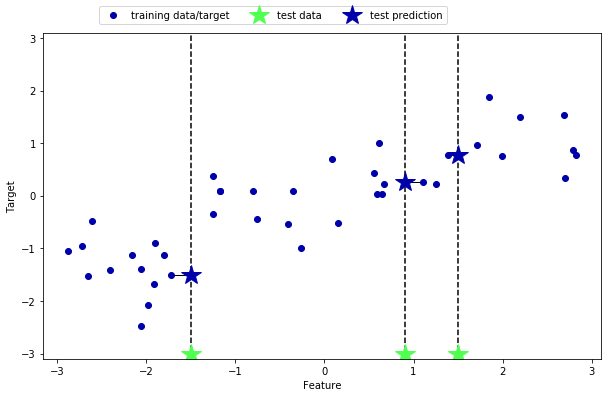

In [239]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

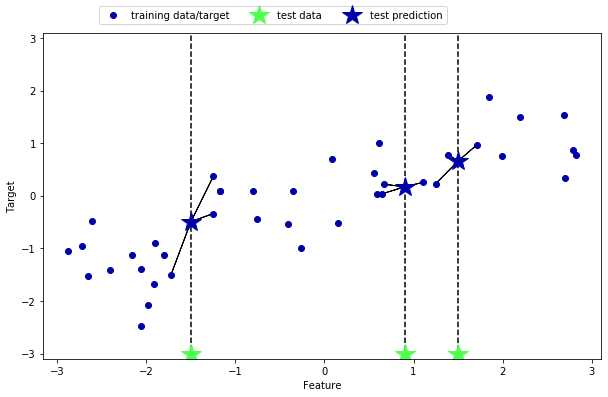

In [240]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## Fitting a k Nearest Neighbor Regressor

### Searching for Optimal Number of Neighbors

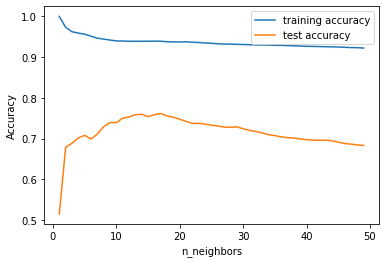

In [303]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Fitting the model with optimal number of neighbors (=18)

In [285]:
from sklearn.neighbors import KNeighborsRegressor

# split the wave dataset into a training and a test set
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=19)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [286]:
y_pred=reg.predict(X_test)

In [287]:
len(y_pred)

379

In [288]:
len(y_test)

379

In [293]:
#print("Test set predictions:\n{}".format(y_pred))

In [294]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.75


### Model Accuracy Metrics

In [295]:
MAE=mean_absolute_error(y_test,y_pred)

RMSE= sqrt(mean_squared_error(y_test, y_pred))

MAPE=np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(reg.score(X_test, y_test)))

print("RMSE=",RMSE)
print("MAE=",MAE)
print("MAPE=",MAPE)
print("r2=", r2_score(y_test, y_pred))
#print("MAPE=",MAPE)

Accuracy on training set: 0.937
Accuracy on test set: 0.752
RMSE= 3.1272768393960604
MAE= 2.142108297825301
MAPE= 3.3940926399533993
r2= 0.7523562597987634


### Visulize the Results

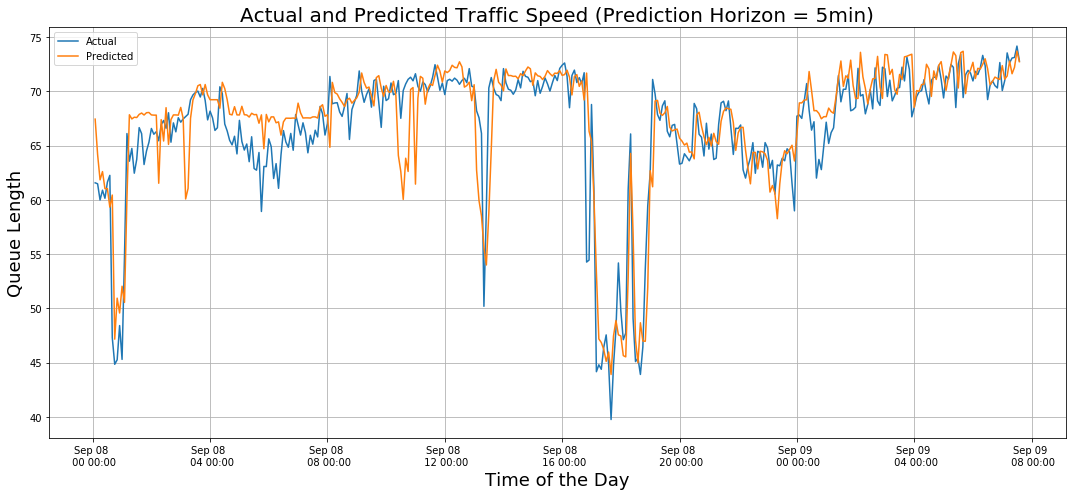

In [296]:
fig,ax2 = plt.subplots(figsize=(15,7))

monthyearFmt = mdates.DateFormatter('%b %d \n %H %M:%S')

ax2.xaxis.set_major_formatter(monthyearFmt)

ax2.plot(dates,y_test,label='Actual')

ax2.plot(dates,y_pred,label='Predicted')

ax2.set_title('Actual and Predicted Traffic Speed (Prediction Horizon = 5min)',size=20)

ax2.set_xlabel('Time of the Day',size=18)

ax2.set_ylabel('Queue Length',size=18)

plt.grid(True)

plt.legend()

plt.tight_layout()


### Visuliz the nearest neigbors

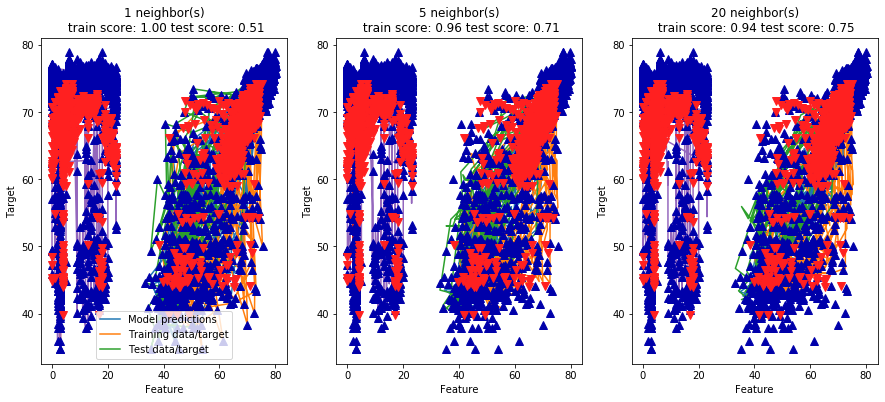

In [302]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for n_neighbors, ax in zip([1, 5, 20], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_train, reg.predict(X_train))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")